In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# read the dataset
data=pd.read_csv('data_car.csv')

In [16]:
#Display the top 5 rows of the dataset
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Exploratory data Analysis

In [4]:
# returns description of the data in the DataFrame
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
#prints information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
# finds the correlation of each column in a DataFrame.
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [7]:
# total no of rows and columns in the dataframe
data.shape

(11914, 16)

In [8]:
# returns column names
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# Histogram for frequency distribution

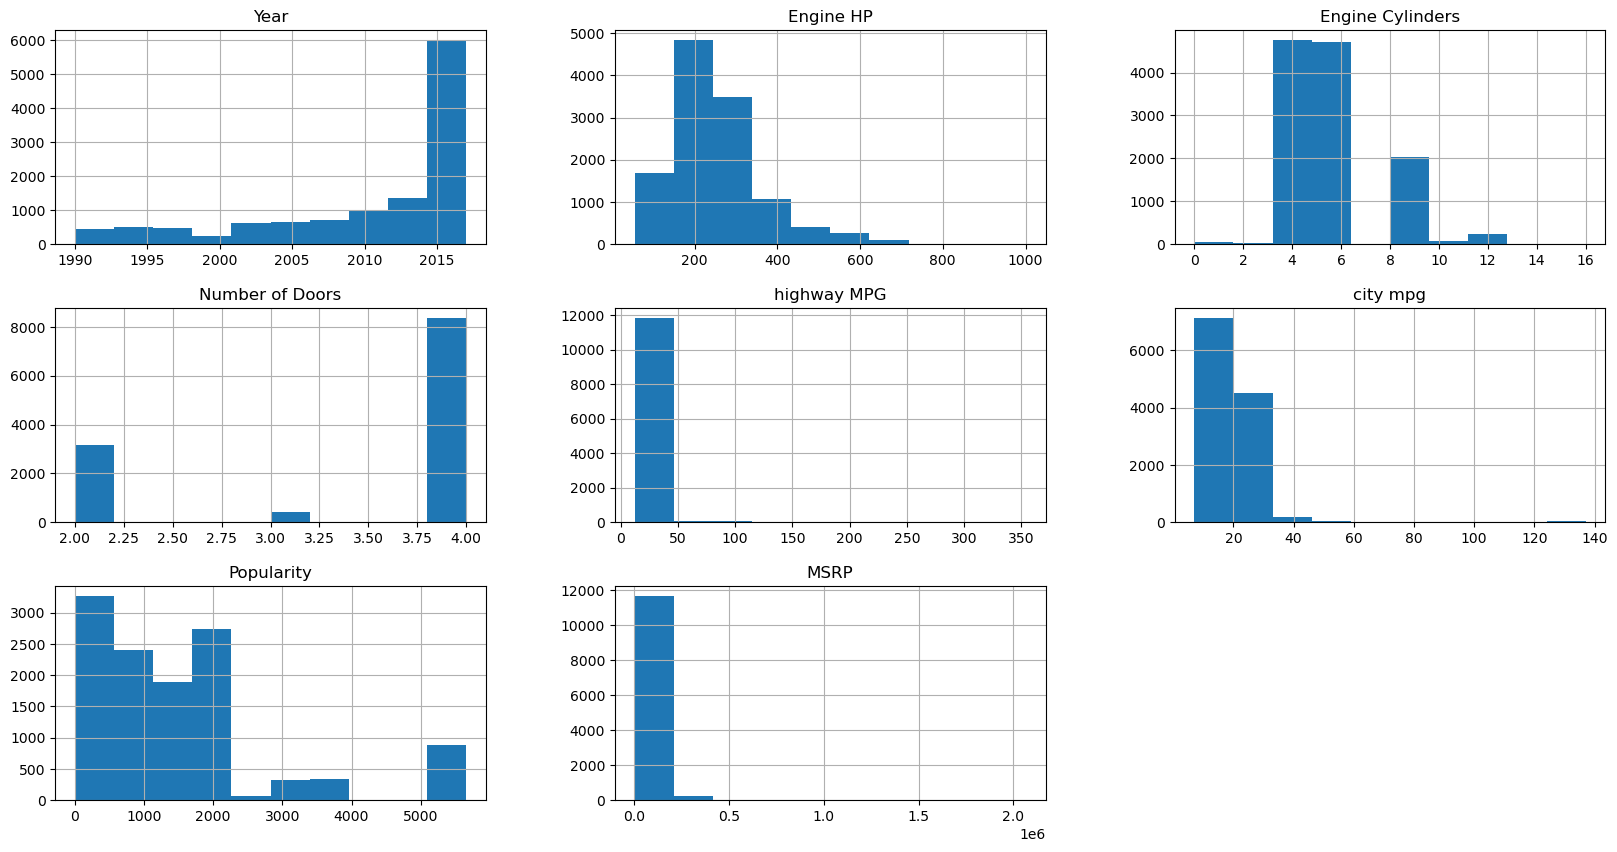

In [9]:
freq_graph=data.select_dtypes(include=['int','float'])
freq_graph.hist(figsize=(20,10))
plt.show()

In [12]:
# checking for duplicate values
data.duplicated().sum()

715

In [13]:
# removing duplicates
data.drop_duplicates(inplace=True)


In [14]:
data.duplicated().sum()

0

In [22]:
# checking for null values
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Handling null values

In [24]:
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0],inplace=True)

In [32]:
data['Engine HP'].fillna(data['Engine HP'].mean(),inplace=True)
data['Engine Cylinders'].fillna(data['Engine Cylinders'].mean(),inplace=True)
data['Market Category'].fillna(data['Market Category'].mode()[0],inplace=True)

In [33]:
# checking for null values
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [34]:
#  NUmerical columns
data_numerical=data.select_dtypes(include=['int','float'])
data_numerical.columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [35]:
# Categorical columns

data_categorical=data.select_dtypes(include=['object'])
data_categorical.columns

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

# Checking correlation between independent and dependent variable

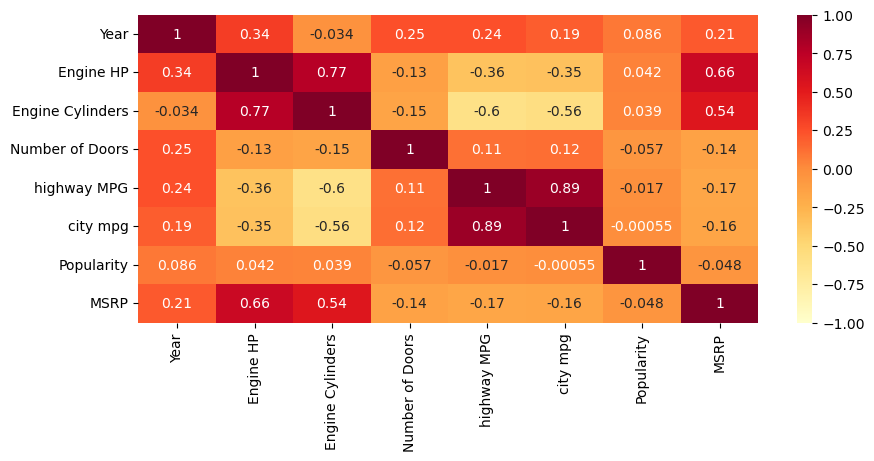

In [36]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-1,vmax=1,cmap='YlOrRd', center=0)
plt.show()

# FInding highly correlated independent features

In [72]:
X=data.drop('MSRP',axis=1)
def correlation(dataset,threshold):
    col_corr=set()        # set of all the names of correlated matrix
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr  

In [73]:
corr_features=correlation(X,0.70)
corr_features

{'Engine Cylinders', 'city mpg'}

# dropping features using correlation coeffiecient

In [74]:
data.drop(['Engine Cylinders', 'city mpg'],axis=1,inplace=True)

In [75]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'Popularity', 'MSRP'],
      dtype='object')

In [83]:

data_numerical=data.select_dtypes(include=['int','float'])
data_categorical=data.select_dtypes(include=['object'])

In [84]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'Popularity', 'MSRP'],
      dtype='object')

# Checking unique values for each attributes

In [85]:
for i in ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG','Popularity', 'MSRP']:
    print(f"{i} = ",data[i].nunique())

Make =  48
Model =  915
Year =  22
Engine Fuel Type =  10
Engine HP =  283
Transmission Type =  5
Driven_Wheels =  4
Number of Doors =  3
Market Category =  71
Vehicle Size =  3
Vehicle Style =  16
highway MPG =  31
Popularity =  47
MSRP =  5281


# checking for outliers

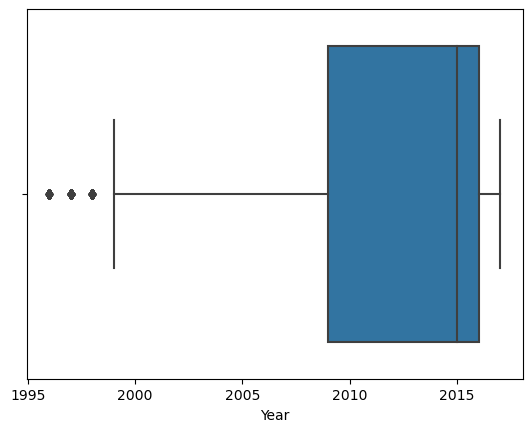

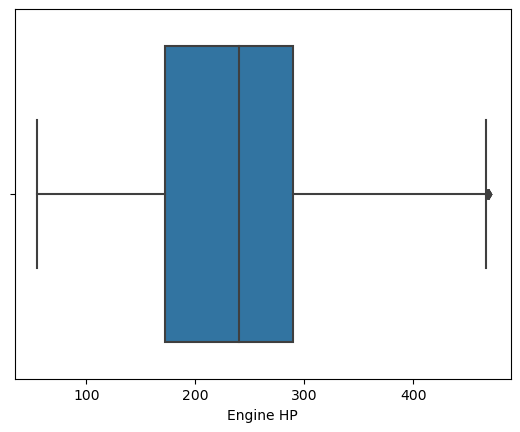

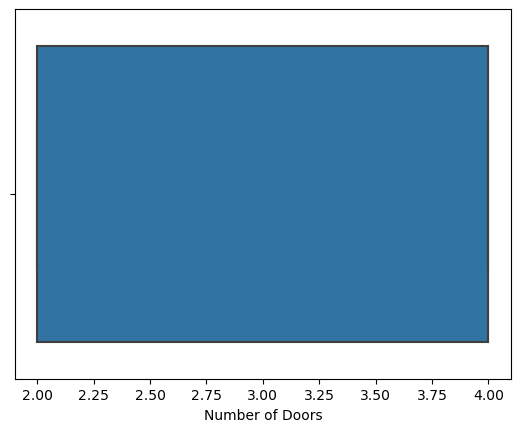

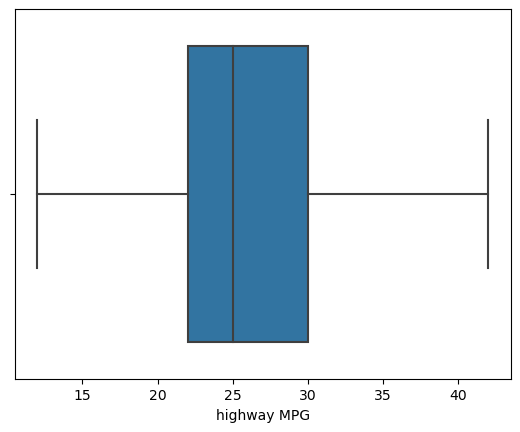

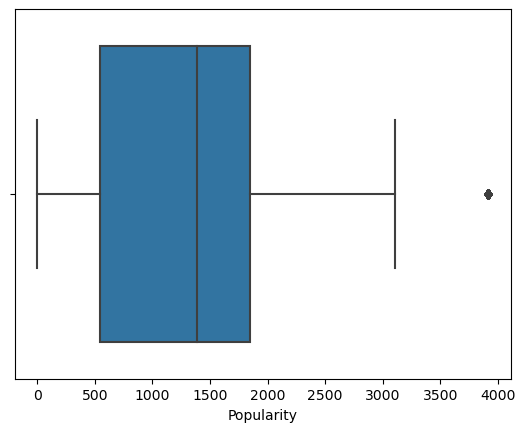

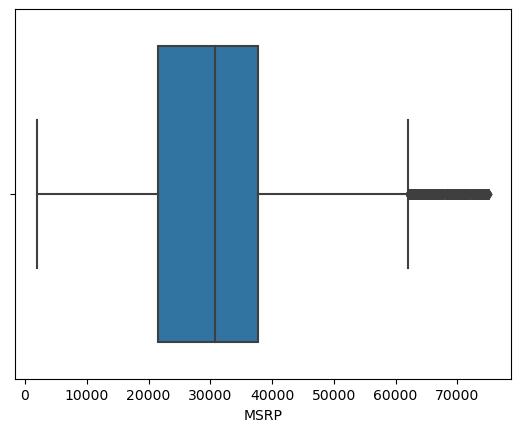

In [86]:
for i in data_numerical:
    sns.boxplot(x=data_numerical[i])
    plt.show()

# Handling outliers

In [87]:
for i in data_numerical:
    IQR=stats.iqr(data[i],interpolation='midpoint')
#     print(IQR)
    Q1=data[i].quantile(.25)
    Q3=data[i].quantile(.75)
    min_limit=Q1-1.5*IQR
    max_limit=Q3+1.5*IQR
    data.loc[data[i]<min_limit,i]=np.median(data[i])
    data.loc[data[i]>max_limit,i]=np.median(data[i])

In [88]:
data_numerical=data.select_dtypes(include=['int','float'])

# Encoding categorical columns to numerical

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data_categorical:
    data[i]=le.fit_transform(data[i])


In [91]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,Popularity,MSRP
0,4,1,2011,8,335.0,3,3,2.0,38,0,8,26,1385,46135
1,4,0,2011,8,300.0,3,3,2.0,67,0,6,28,1385,40650
2,4,0,2011,8,300.0,3,3,2.0,64,0,8,28,1385,36350
3,4,0,2011,8,230.0,3,3,2.0,67,0,8,28,1385,29450
4,4,0,2011,8,230.0,3,3,2.0,63,0,6,28,1385,34500


# Scaling and normalization

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

Popularity=data['Popularity'].values.reshape(-1,1)
scaled_Popularity=scaler.fit_transform(Popularity)
data['Popularity']=scaled_Popularity


EngineHP=data['Engine HP'].values.reshape(-1,1)
scaled_engine=scaler.fit_transform(EngineHP)
data['Engine HP']=scaled_engine

MarketCategory=data['Market Category'].values.reshape(-1,1)
scaled_market=scaler.fit_transform(MarketCategory)
data['Market Category']=scaled_market
data.head()




,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,Popularity,MSRP
0,4,1,2011,8,0.679612,3,3,2.0,0.542857,0,8,26,0.445698,46135
1,4,0,2011,8,0.594660,3,3,2.0,0.957143,0,6,28,0.445698,40650
2,4,0,2011,8,0.594660,3,3,2.0,0.914286,0,8,28,0.445698,36350
3,4,0,2011,8,0.424757,3,3,2.0,0.957143,0,8,28,0.445698,29450
4,4,0,2011,8,0.424757,3,3,2.0,0.900000,0,6,28,0.445698,34500


In [114]:
data=data.dropna(axis=1)

# Hold out approach

In [115]:
y=data['MSRP']
x=data.drop(['MSRP'],axis=1)
x

,Make,Model,Year,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,Popularity
0,4,1,2011,8,0.679612,3,3,0.542857,0,8,26,0.445698
1,4,0,2011,8,0.594660,3,3,0.957143,0,6,28,0.445698
2,4,0,2011,8,0.594660,3,3,0.914286,0,8,28,0.445698
3,4,0,2011,8,0.424757,3,3,0.957143,0,8,28,0.445698
4,4,0,2011,8,0.424757,3,3,0.900000,0,6,28,0.445698
...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,0.594660,1,0,0.185714,2,2,23,0.065098
11910,0,901,2012,8,0.594660,1,0,0.185714,2,2,23,0.065098
11911,0,901,2012,8,0.594660,1,0,0.185714,2,2,23,0.065098
11912,0,901,2013,7,0.594660,1,0,0.185714,2,2,23,0.065098


In [116]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11199, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Linear regression

In [118]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [120]:
y_pred=model.predict(x_test)
y_pred

array([26838.99472343, 28247.40036513,  7531.98108574, ...,
       32925.48998261, 24640.56812083, 32954.07134598])

In [121]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE=",mean_squared_error(y_test,y_pred))
print("r2 _score",r2_score(y_test,y_pred))

MSE= 91716828.01543401
r2 _score 0.5282957169123366


# Lasso Regression

In [123]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import metrics

In [124]:
Lasso_reg_model=Lasso()
Lasso_reg_model.fit(x_train,y_train)

Lasso()

In [127]:
training_data_pred=Lasso_reg_model.predict(x_test)
y_pred=Lasso_reg_model.predict(x_test)

In [128]:
error_score=metrics.r2_score(y_test,training_data_pred)
print("mean squared error=",mean_squared_error(y_test,y_pred))
print("R squared value=",r2_score(y_test,y_pred))

mean squared error= 91716882.89359158
R squared value= 0.5282954346711979


# Support Vector Regressor

In [129]:
from sklearn.svm import SVR

In [131]:
svmrg=SVR(kernel='linear')
svmrg.fit(x_train,y_train)


SVR(kernel='linear')

In [132]:
y_pred = svmrg.predict(x_test)

In [133]:
y_pred

array([37087.7932805 , 28144.94134713, 22846.07250257, ...,
       27287.78756992, 32650.3568009 , 29963.46185612])

In [134]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE=",mean_squared_error(y_test,y_pred))
print("r2 _score",r2_score(y_test,y_pred))

MSE= 153272426.72277737
r2 _score 0.21171216091110678


# Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rf_reg=RandomForestRegressor()

In [138]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [140]:
y_pred=rf_reg.predict(x_test)
y_pred

array([33780.43791667, 27998.86468254, 17931.365     , ...,
       28104.14656193, 30675.        , 45439.74166667])

In [141]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE=",mean_squared_error(y_test,y_pred))
print("r2 _score",r2_score(y_test,y_pred))

MSE= 19163008.828876235
r2 _score 0.9014436768364197


# Decision Tree 

In [142]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor()

In [143]:
dec_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [144]:
y_pred=dec_reg.predict(x_test)
y_pred

array([33931.66666667, 27835.        , 17899.        , ...,
       28091.85714286, 30675.        , 47495.        ])

In [145]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE=",mean_squared_error(y_test,y_pred))
print("r2 _score",r2_score(y_test,y_pred))

MSE= 25962922.47773518
r2 _score 0.8664713771810799


In [ ]:
# Among All models r2 score of Random forest regressor is greater. so it performs well compared to other models.
# The standards for a good R-squared reading can be much higher, such as 0.9 or above.